In [ ]:
# Uncomment the below command if you don't have openpyxl
#!pip install openpyxl 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
market_data = pd.read_excel("../../raw_data/market_data.xlsx")

In [4]:
# Create a period for a whole day which are 48 as
# Spot prices are taken by the 30 minutes mark.
period = []
count = 1
for i in range(1, len(market_data) + 1):
    period.append(count)
    count += 1
    if (i % 48) == 0:
        count = 1
        
market_data['period'] = pd.Series(period)

In [5]:
market_data['Time (UTC+10)'] = pd.to_datetime(market_data['Time (UTC+10)'])
market_data['date'] = market_data['Time (UTC+10)'].dt.date
columns_name = market_data.columns
market_data.columns = [i for i in range(len(columns_name))]

In [6]:
for column in range(len(columns_name)):
    print(column, ":", columns_name[column])

0 : Time (UTC+10)
1 : Regions NSW Trading Price ($/MWh)
2 : Regions SA Trading Price ($/MWh)
3 : Regions TAS Trading Price ($/MWh)
4 : Regions VIC Trading Price ($/MWh)
5 : Regions NSW Trading Total Intermittent Generation (MW)
6 : Regions SA Trading Total Intermittent Generation (MW)
7 : Regions TAS Trading Total Intermittent Generation (MW)
8 : Regions VIC Trading Total Intermittent Generation (MW)
9 : Regions NSW Operational Demand (MW)
10 : Regions SA Operational Demand (MW)
11 : Regions TAS Operational Demand (MW)
12 : Regions VIC Operational Demand (MW)
13 : period
14 : date


In [7]:
vic_market_data = market_data[[14, 13, 4, 8, 12]]

In [8]:
transformed_vic_data = []
tmp = [0 for i in range(48*3 + 1)]
for index, row in vic_market_data.iterrows():
    tmp[0] = row[14]
    tmp[row[13]] = row[4]
    tmp[row[13] + 48] = row[8]
    tmp[row[13] + 48 + 48] = row[12]
    if (row[13] == 48.0) :
        transformed_vic_data.append(tmp)
        tmp = [0 for i in range(48*3 + 1)]

In [9]:
transformed_vic_data = pd.DataFrame(transformed_vic_data)
transformed_vic_data

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,2018-01-01,90.43,92.46,87.62,73.08,70.18,67.43,66.31,67.72,65.50,...,4760,4667,4602,4602,4516,4425,4329,4254,4228,4429
1,2018-01-02,60.31,57.33,56.32,51.96,53.57,52.50,53.61,53.13,53.75,...,4946,4868,4876,4875,4783,4685,4522,4448,4379,4616
2,2018-01-03,66.02,59.33,55.01,46.83,46.92,49.74,49.37,50.99,52.00,...,4966,4882,4850,4861,4800,4726,4554,4484,4431,4653
3,2018-01-04,69.84,64.18,59.57,49.52,51.14,53.93,54.01,40.40,52.69,...,5408,5310,5247,5176,5074,4898,4729,4626,4543,4736
4,2018-01-05,114.52,78.06,75.22,61.50,57.48,55.34,56.63,56.06,53.90,...,6456,6195,6058,5885,5736,5502,5285,5072,4946,5105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,2021-08-10,68.84,38.65,-4.50,8.96,-9.94,-3.25,-15.00,-20.74,-26.44,...,6662,6455,6307,6150,5975,5831,5618,5393,5178,5208
1318,2021-08-11,8.14,-11.02,-2.19,-19.60,-22.34,-2.32,-3.98,-12.92,-18.24,...,6864,6665,6520,6308,6122,5911,5695,5450,5269,5332
1319,2021-08-12,47.73,50.64,55.02,38.75,33.34,7.47,-8.39,-10.77,-9.67,...,6685,6658,6563,6386,6211,6028,5745,5508,5319,5364
1320,2021-08-13,82.45,87.54,62.53,28.96,27.50,32.28,36.08,37.61,35.02,...,6506,6416,6352,6221,6108,5935,5824,5633,5456,5515


In [10]:
spot_price_vic = transformed_vic_data.iloc[:, 0:48]
tti_vic = transformed_vic_data.iloc[:, 48:(48*2)]
op_demand_vic = transformed_vic_data.iloc[:, (48*2):(48*3)]

In [11]:
spot_price_vic

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,2018-01-01,90.43,92.46,87.62,73.08,70.18,67.43,66.31,67.72,65.50,...,68.77,70.64,67.80,73.90,77.97,70.04,71.25,66.06,64.77,61.09
1,2018-01-02,60.31,57.33,56.32,51.96,53.57,52.50,53.61,53.13,53.75,...,74.12,76.40,67.80,76.62,78.06,68.68,66.61,60.58,63.89,62.97
2,2018-01-03,66.02,59.33,55.01,46.83,46.92,49.74,49.37,50.99,52.00,...,73.66,76.22,77.83,71.99,66.75,63.98,63.74,62.66,62.53,63.84
3,2018-01-04,69.84,64.18,59.57,49.52,51.14,53.93,54.01,40.40,52.69,...,79.99,68.93,88.76,97.99,98.12,90.66,71.57,67.90,64.97,63.21
4,2018-01-05,114.52,78.06,75.22,61.50,57.48,55.34,56.63,56.06,53.90,...,146.27,106.28,84.57,99.45,97.58,80.73,77.38,76.58,65.34,68.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,2021-08-10,68.84,38.65,-4.50,8.96,-9.94,-3.25,-15.00,-20.74,-26.44,...,176.21,89.10,65.66,65.78,67.55,66.44,64.90,34.55,13.97,3.51
1318,2021-08-11,8.14,-11.02,-2.19,-19.60,-22.34,-2.32,-3.98,-12.92,-18.24,...,84.83,89.42,60.96,59.77,62.06,70.00,61.52,43.00,54.29,49.25
1319,2021-08-12,47.73,50.64,55.02,38.75,33.34,7.47,-8.39,-10.77,-9.67,...,174.54,173.37,100.62,79.67,86.57,92.23,81.98,71.77,100.04,81.22
1320,2021-08-13,82.45,87.54,62.53,28.96,27.50,32.28,36.08,37.61,35.02,...,87.25,82.21,82.63,84.52,80.71,87.64,74.41,71.49,85.63,72.51


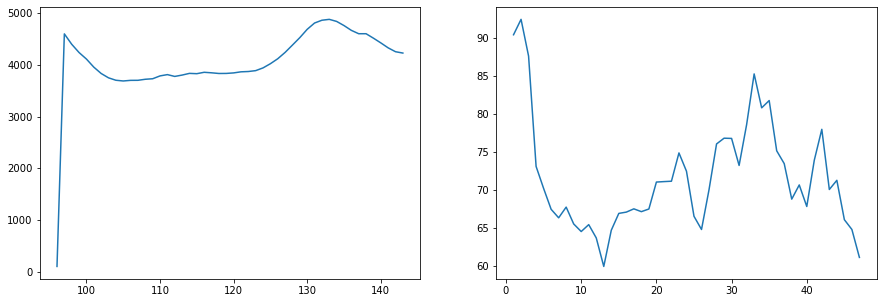

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
op_demand_vic.iloc[0, 0:48].T.plot(legend = False, ax = axs[0])
spot_price_vic.iloc[0, 1:48].T.plot(legend = False, ax = axs[1])
plt.show()

> Idea is to find the first minimum after the start of the day and find out when the next peak is, cutting of the past data including the minimum (after saving it).

In [16]:
tti_vic

,48,49,50,51,52,53,54,55,56,57,...,86,87,88,89,90,91,92,93,94,95
0,63.55,146.87,131.68,119.98,123.86,132.72,120.73,128.69,122.97,116.66,...,151.51,181.25,185.54,179.73,172.92,175.67,166.08,158.81,114.76,96.57
1,65.81,100.61,105.78,118.78,111.36,90.74,89.41,87.41,87.90,76.44,...,259.05,258.45,237.79,234.92,233.37,222.63,203.63,211.24,195.81,157.88
2,68.42,189.55,151.35,162.32,181.14,199.27,208.08,205.66,211.32,184.68,...,220.42,225.26,217.14,202.56,164.32,146.14,132.48,105.89,63.04,49.68
3,81.61,40.14,49.63,53.46,55.19,48.13,39.93,41.50,33.60,21.23,...,114.48,150.52,144.07,125.04,135.75,122.03,93.75,94.53,96.30,89.06
4,69.87,57.71,42.17,30.11,21.05,17.89,16.67,14.41,17.90,16.69,...,42.18,35.98,34.45,23.82,28.41,28.99,26.88,38.90,50.08,69.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,-9.78,303.03,279.64,265.23,252.21,236.36,240.18,274.54,312.60,327.70,...,430.78,440.23,438.85,432.81,427.34,433.25,431.10,431.05,435.89,433.41
1318,51.37,424.69,422.66,412.31,388.97,349.26,346.99,326.87,299.95,286.28,...,275.37,286.02,249.06,236.31,271.03,259.12,304.83,321.83,330.72,320.81
1319,73.99,288.88,260.74,260.24,250.91,266.53,255.13,251.63,244.33,244.83,...,136.29,155.87,153.64,148.82,164.43,156.82,163.95,170.07,165.60,173.76
1320,76.50,148.02,153.15,123.15,129.53,140.48,143.72,144.55,154.78,152.83,...,154.05,111.95,95.60,97.61,77.23,79.67,76.54,69.41,60.82,63.38
